In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
import sklearn
import datetime
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
pd.set_option('display.max_columns',None)
%matplotlib inline

# 缺失值处理
from sklearn.impute import SimpleImputer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pd.set_option('display.max_columns', None)

# **Customer Info**

In [5]:
Cust_Info = pd.read_csv("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_Cust_Info.txt", sep='|',header=None, names=["Customer_id", "age", "FirstContactDay", "PBK_Ind", "HIB_Status", "OccuCode", "OccuDesc", "Gender", "Cntry_Correspondense", "InterCorpACIndicator", "NationCode", "IncomeLevel", "Salary", "Period_Salary", "Marital_Status", "Number_Children", "Education_Level", "Home_Ownership", "Car_Ownership", "Cust_Segment", "BusSector", "BusDesc"])
Cust_Info[:5]

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,NationCode,IncomeLevel,Salary,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,F,CN,N,CN,6,25000.0,M,2.0,0.0,NaN,NaN,Y,Attrition,00130,OTHERS ...
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,CN,8,80000.0,M,NaN,0.0,NaN,NaN,NaN,A,00275,RECREATION ...
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,CN,5,10000.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,NaN,NaN
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,M,CN,N,CN,7,30000.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,00194,OTHER FINANCIAL INDUSTRY ...
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,M,CN,N,CN,5,200000.0,Y,2.0,0.0,4.0,1.0,NaN,D,,NaN


In [6]:
Cust_Info.shape

(300039, 22)

In [7]:
New_Cust_Info = Cust_Info[20170700<Cust_Info['FirstContactDay']]
print(len(New_Cust_Info))
New_Cust_Info[:5]

98365


,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,NationCode,IncomeLevel,Salary,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,CN,8,80000.0,M,NaN,0.0,NaN,NaN,NaN,A,00275,RECREATION ...
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,M,CN,N,CN,5,200000.0,Y,2.0,0.0,4.0,1.0,NaN,D,,NaN
9,500999801122196,38.0,20180606,0,NaN,1.0,PROFESSIONAL/SENIOR ADMINISTRATIVE,M,CN,N,CN,8,680000.0,Y,2.0,0.0,4.0,4.0,NaN,D,,NaN
10,500999801040158,31.0,20180305,0,NaN,3.0,CLERICAL,M,CN,N,CN,5,150000.0,Y,2.0,0.0,4.0,1.0,NaN,D,,NaN
11,500999800933280,24.0,20171108,0,NaN,3.0,CLERICAL,F,CN,N,CN,5,150000.0,Y,1.0,0.0,4.0,1.0,NaN,D,,NaN


In [8]:
Old_Cust_Info = Cust_Info[20170700>Cust_Info['FirstContactDay']]
print(len(Old_Cust_Info))
Old_Cust_Info[:5]

201674


,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,NationCode,IncomeLevel,Salary,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,F,CN,N,CN,6,25000.0,M,2.0,0.0,NaN,NaN,Y,Attrition,00130,OTHERS ...
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,CN,5,10000.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,NaN,NaN
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,M,CN,N,CN,7,30000.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,00194,OTHER FINANCIAL INDUSTRY ...
5,500999800375760,NaN,20150720,0,NaN,NaN,NaN,NaN,CN,N,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,,NaN
6,500999800438751,32.0,20120727,0,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,M,CN,N,CN,4,8001.0,M,NaN,0.0,NaN,NaN,NaN,Attrition,NaN,NaN


## Distribution

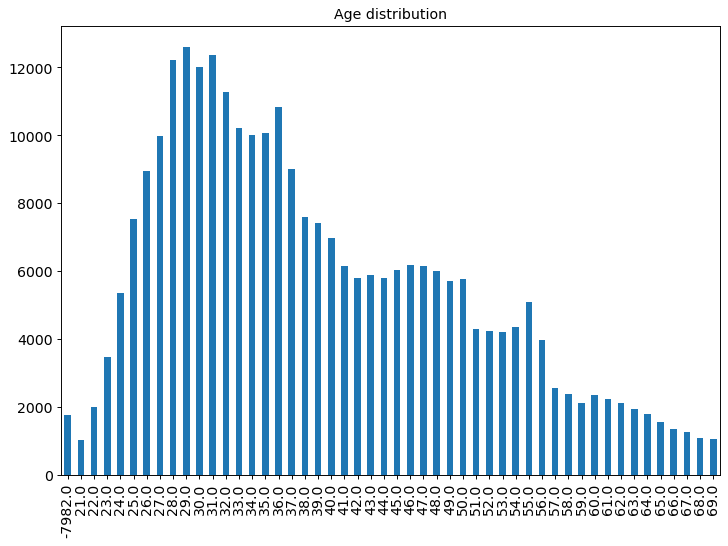

In [8]:
age_dis = Cust_Info['age'].value_counts()[:21]
age_dis.sort_index(ascending=True, inplace=True)
plt.figure(dpi=85)
age_dis.plot(kind='bar', figsize=(10,7), title='Age distribution', fontsize=12)

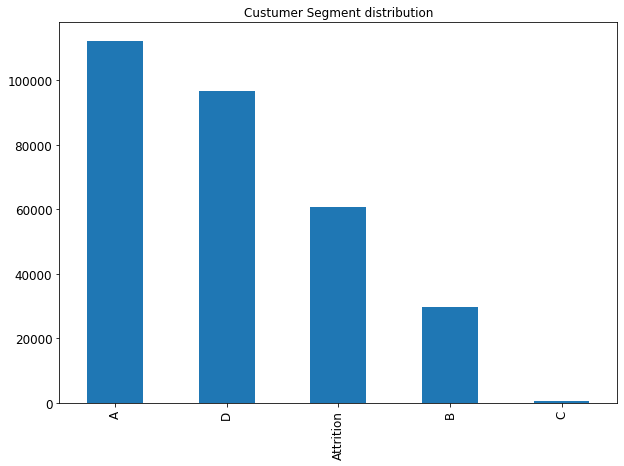

In [9]:
Cust_Info['Cust_Segment'].value_counts().plot(kind='bar', figsize=(10,7), title='Custumer Segment distribution', fontsize=12)

In [ ]:
# age and customer segment
# Cust_Info.plot.scatter(x='age', y='Cust_Segment')

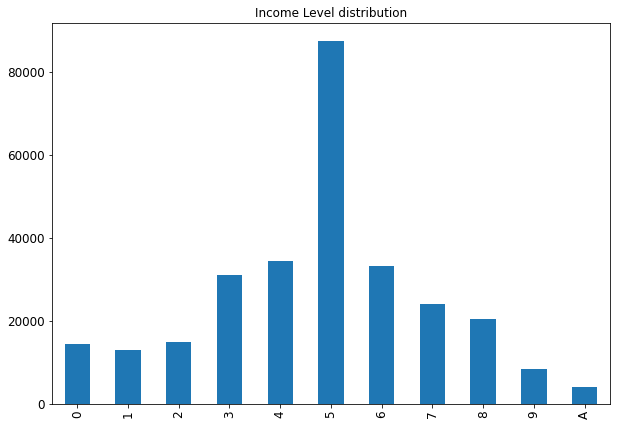

In [10]:
age_dis = Cust_Info['IncomeLevel'].value_counts()
age_dis.sort_index(ascending=True, inplace=True)
age_dis.plot(kind='bar', figsize=(10,7), title='Income Level distribution', fontsize=12)

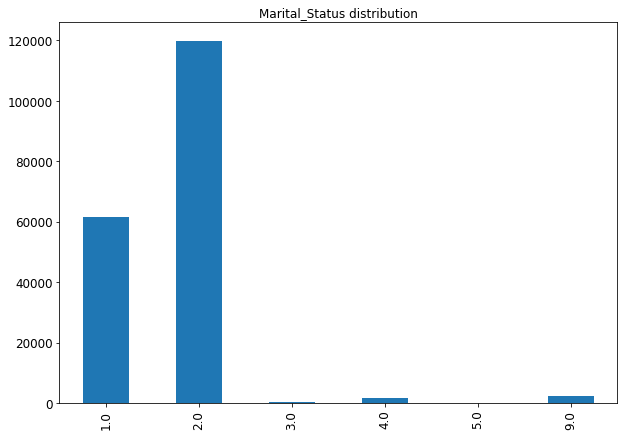

In [11]:
Marital_Status_dis = Cust_Info['Marital_Status'].value_counts()
Marital_Status_dis.sort_index(ascending=True, inplace=True)
Marital_Status_dis.plot(kind='bar', figsize=(10,7), title='Marital_Status distribution', fontsize=12)
# Marital_Status	Number_Children	Education_Level	Home_Ownership	Car_Ownership

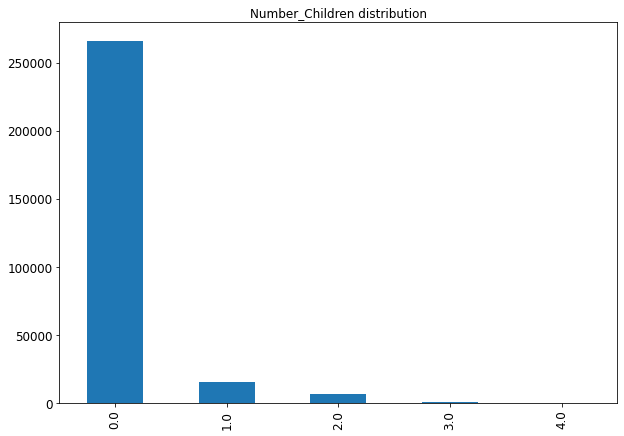

In [12]:
Number_Children_dis = Cust_Info['Number_Children'].value_counts()[:4]
Number_Children_dis.sort_index(ascending=True, inplace=True)
Number_Children_dis.plot(kind='bar', figsize=(10,7), title='Number_Children distribution', fontsize=12)
# Marital_Status	Number_Children	Education_Level	Home_Ownership	Car_Ownership

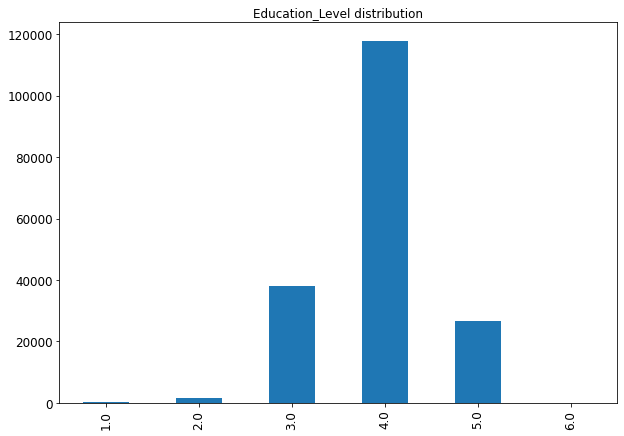

In [13]:
Education_Level_dis = Cust_Info['Education_Level'].value_counts()
Education_Level_dis.sort_index(ascending=True, inplace=True)
Education_Level_dis.plot(kind='bar', figsize=(10,7), title='Education_Level distribution', fontsize=12)
# Marital_Status	Number_Children	Education_Level	Home_Ownership	Car_Ownership

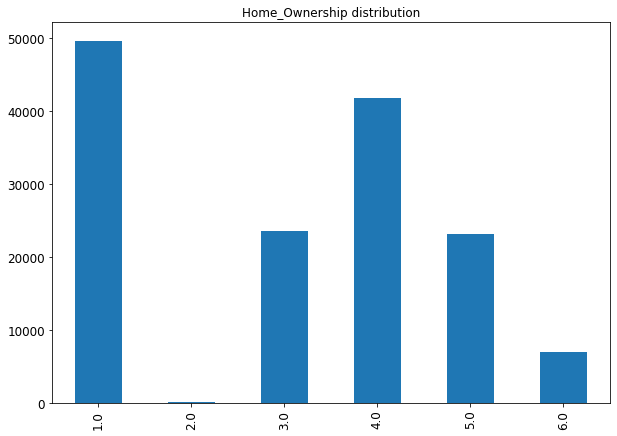

In [14]:
Home_Ownership_dis = Cust_Info['Home_Ownership'].value_counts()
Home_Ownership_dis.sort_index(ascending=True, inplace=True)
Home_Ownership_dis.plot(kind='bar', figsize=(10,7), title='Home_Ownership distribution', fontsize=12)
# Marital_Status	Number_Children	Education_Level	Home_Ownership	Car_Ownership

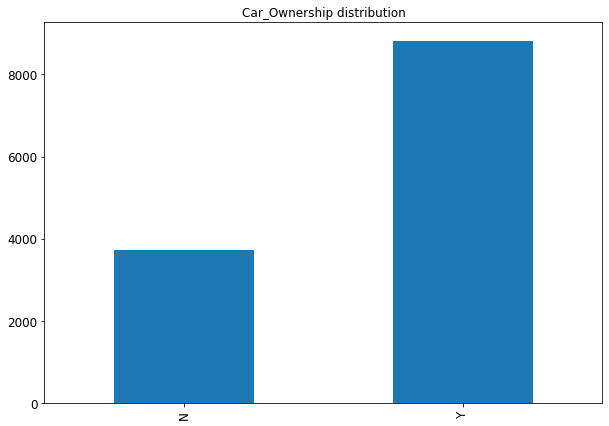

In [15]:
Car_Ownership_dis = Cust_Info['Car_Ownership'].value_counts()
Car_Ownership_dis.sort_index(ascending=True, inplace=True)
Car_Ownership_dis.plot(kind='bar', figsize=(10,7), title='Car_Ownership distribution', fontsize=12)
# Marital_Status	Number_Children	Education_Level	Home_Ownership	Car_Ownership

## Causal Inference

In [16]:
# Assign Different Customer segments different values
# A: Premier & Jade; B: advance; C: mass; D: credit card only
Cust_Info['Cust_Segment'].replace('Attrition',1,inplace=True)
Cust_Info['Cust_Segment'].replace('D',2,inplace=True)
Cust_Info['Cust_Segment'].replace('C',3,inplace=True)
Cust_Info['Cust_Segment'].replace('B',4,inplace=True)
Cust_Info['Cust_Segment'].replace('A',5,inplace=True)

# Assign gender: 1 to male;  0 to female
Cust_Info['Gender'].replace('M',1,inplace=True)
Cust_Info['Gender'].replace('F',0,inplace=True)

# Assign 1 to hold overseas HSBC account; 0 otherwise
Cust_Info['InterCorpACIndicator'].replace('Y  ',1,inplace=True)
Cust_Info['InterCorpACIndicator'].replace('N  ',0,inplace=True)

# Calculate how long do the customer contact HSBC
Cust_Info['YearsAfterFirstContact'] = 2018 - Cust_Info['FirstContactDay']//10000

Cust_Info[:5]

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc,YearsAfterFirstContact
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,0.0,CN,0,...,M,2.0,0.0,NaN,NaN,Y,1,00130,OTHERS ...,9
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,5,00275,RECREATION ...,1
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,2
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,1,00194,OTHER FINANCIAL INDUSTRY ...,5
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,0,...,Y,2.0,0.0,4.0,1.0,NaN,2,,NaN,1


In [17]:
Cust_Info['Education_Level'].isna().sum()

115138

In [18]:
# There are 10934 nan for age;
#           12852 nan for OccuCode

features = ['age', 'YearsAfterFirstContact', 'PBK_Ind', 'OccuCode', 'InterCorpACIndicator', 'Gender','Education_Level']

# drop lines with nan
drop_Cust_Info = Cust_Info.dropna(subset=features)
print(drop_Cust_Info.shape[0])

# take random n lines from data to avoid large n
drop_Cust_Info = drop_Cust_Info.sample(n=3003)
print(drop_Cust_Info.shape[0])

OLS_Cust_seg = sm.OLS(endog = drop_Cust_Info['Cust_Segment'], exog = sm.add_constant(drop_Cust_Info[features]))
result_OLS_Cust_seg = OLS_Cust_seg.fit()
print(result_OLS_Cust_seg.summary())

184863
3003
                            OLS Regression Results                            
Dep. Variable:           Cust_Segment   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     580.5
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        03:06:01   Log-Likelihood:                -4062.3
No. Observations:                3003   AIC:                             8141.
Df Residuals:                    2995   BIC:                             8189.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Unsupervised Cluster

In [19]:
features.remove('OccuCode')
features.remove('Gender')
features.remove('age')
print(features)

['YearsAfterFirstContact', 'PBK_Ind', 'InterCorpACIndicator', 'Education_Level']


In [20]:
Cluster_data = drop_Cust_Info[features]

In [21]:
Cluster_data

,YearsAfterFirstContact,PBK_Ind,InterCorpACIndicator,Education_Level
298923,4,0,0,3.0
17506,1,0,0,4.0
108527,0,0,0,3.0
87856,1,0,0,3.0
166830,1,0,0,3.0
...,...,...,...,...
20211,1,0,0,4.0
298606,1,0,0,4.0
182420,1,0,0,4.0
232394,1,0,0,4.0


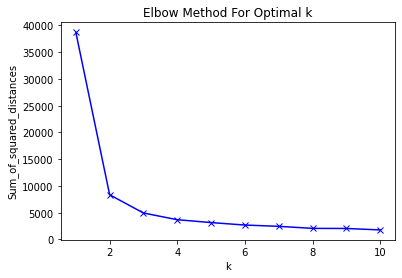

In [22]:
# define function to find the best k number
from sklearn.cluster import KMeans

def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,11) # 21
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(Cluster_data)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000,init='k-means++').fit(Cluster_data)
print(kmeans.labels_)

# The center of each cluster
print(kmeans.cluster_centers_)

[4 3 0 ... 3 3 3]
[[3.09941520e-01 1.28654971e-01 1.22124533e-15 3.49473684e+00]
 [7.33971292e+00 3.15789474e-01 6.77033493e-01 3.96889952e+00]
 [1.13516949e+01 3.94067797e-01 6.39830508e-01 4.30084746e+00]
 [1.09359606e+00 1.27257800e-01 7.38916256e-03 4.14367816e+00]
 [3.89855072e+00 3.33333333e-01 1.23188406e-01 3.62681159e+00]]


In [24]:
kmeans.cluster_centers_

array([[3.09941520e-01, 1.28654971e-01, 1.22124533e-15, 3.49473684e+00],
       [7.33971292e+00, 3.15789474e-01, 6.77033493e-01, 3.96889952e+00],
       [1.13516949e+01, 3.94067797e-01, 6.39830508e-01, 4.30084746e+00],
       [1.09359606e+00, 1.27257800e-01, 7.38916256e-03, 4.14367816e+00],
       [3.89855072e+00, 3.33333333e-01, 1.23188406e-01, 3.62681159e+00]])

In [25]:
cluster_data_id = pd.concat([Cust_Info['Customer_id'], Cluster_data],axis=1, join='inner')
cluster_data_id

,Customer_id,YearsAfterFirstContact,PBK_Ind,InterCorpACIndicator,Education_Level
15,500999801076915,0,1,0,4.0
99,500999800850725,1,0,0,5.0
122,500999800983195,1,0,0,4.0
257,500999801109986,0,0,0,4.0
280,500999800377684,11,1,1,5.0
...,...,...,...,...,...
299752,500999800716664,1,0,0,3.0
299802,500999800745392,1,0,0,4.0
299809,500999800902104,1,0,0,4.0
299881,500999800812915,1,0,0,4.0


In [26]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = Cluster_data.index.values
cluster_map.set_index('data_index',inplace=True)
cluster_map = pd.concat([cluster_data_id, cluster_map], axis=1)
cluster_map['cluster'] = kmeans.labels_
cluster_map

,Customer_id,YearsAfterFirstContact,PBK_Ind,InterCorpACIndicator,Education_Level,cluster
15,500999801076915,0,1,0,4.0,4
99,500999800850725,1,0,0,5.0,3
122,500999800983195,1,0,0,4.0,0
257,500999801109986,0,0,0,4.0,0
280,500999800377684,11,1,1,5.0,0
...,...,...,...,...,...,...
299752,500999800716664,1,0,0,3.0,3
299802,500999800745392,1,0,0,4.0,3
299809,500999800902104,1,0,0,4.0,3
299881,500999800812915,1,0,0,4.0,3


In [27]:
cluster_map[cluster_map['cluster'] == 3]

,Customer_id,YearsAfterFirstContact,PBK_Ind,InterCorpACIndicator,Education_Level,cluster
99,500999800850725,1,0,0,5.0,3
297,500999800234743,8,1,1,5.0,3
343,500999800126261,16,1,1,4.0,3
359,500999800018596,7,0,0,2.0,3
442,500999800068972,3,0,0,3.0,3
...,...,...,...,...,...,...
299752,500999800716664,1,0,0,3.0,3
299802,500999800745392,1,0,0,4.0,3
299809,500999800902104,1,0,0,4.0,3
299881,500999800812915,1,0,0,4.0,3


In [28]:
cluster_map.groupby('cluster').mean()

,Customer_id,YearsAfterFirstContact,PBK_Ind,InterCorpACIndicator,Education_Level
cluster,,,,,
0,5.009998e+14,2.628070,0.189474,0.146199,3.895906
1,5.009998e+14,2.846890,0.186603,0.162679,3.944976
2,5.009998e+14,2.381356,0.177966,0.122881,3.800847
3,5.009998e+14,2.911330,0.199507,0.167488,3.886700
4,5.009998e+14,3.170290,0.206522,0.184783,3.981884


# **Product Part**

#### For TD

In [9]:
TD_Holding = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_TD_Holding_20170630.txt",  sep='|',header=None, names=["Product_Class_TD", "Customer_id", "Acct_id", "ACOpenDate_TD", "Currency_TD", "RCYEOD_TD", "LCYEOD_TD", "MTDAVG_TD", "Term_TD","Startdate_TD","Duedate_TD"])
TD_Holding

,Product_Class_TD,Customer_id,Acct_id,ACOpenDate_TD,Currency_TD,RCYEOD_TD,LCYEOD_TD,MTDAVG_TD,Term_TD,Startdate_TD,Duedate_TD
0,TMD,500999800252255,500999800661844,20150213,USD,0.00,0.00,192649.64,7D,20170609,20170616
1,TMD,500999800310345,500999801814057,20120411,CNY,363371.22,363371.22,363371.22,12M,20170413,20180413
2,TMD,500999800537701,500999802065504,20140127,CNY,1417152.37,1417152.37,1417152.37,12M,20170203,20180129
3,TMD,500999800497929,500999803087930,20170531,CNY,94200.00,94200.00,94200.00,24M,20170531,20190531
4,TMD,500999800195663,500999800809872,20140730,CNY,1570000.00,1570000.00,1570000.00,12M,20160801,20170801
...,...,...,...,...,...,...,...,...,...,...,...
28643,TMD,500999800186367,500999800389870,20130314,CAD,8532.10,44489.78,43594.60,1M,20170605,20170705
28644,TMD,500999800387402,500999802981490,20170313,CNY,6287633.94,6287633.94,6278986.82,3M,20170613,20170913
28645,TMD,500999800216082,500999803088192,20170531,CNY,6845200.00,6845200.00,6845200.00,24M,20170531,20190531
28646,TMD,500999800349094,500999801963548,20140306,CNY,628000.00,628000.00,628000.00,60M,20140306,20190306


In [10]:
TD_Mapping = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_TD_mapping.txt",  sep='|',header=None, names=["Product_Class_TD", "Customer_id", "Acct_id", "ACOpenDate_TD", "Currency_TD", "Term_TD", "Startdate_TD", "Duedate_TD"])
TD_Mapping

,Product_Class_TD,Customer_id,Acct_id,ACOpenDate_TD,Currency_TD,Term_TD,Startdate_TD,Duedate_TD
0,TMD,500999800400835,500999802310202,20160909,USD,12M,20160909,20170911
1,TMD,500999800718122,500999803138455,20170703,CNY,3M,20170703,20171009
2,TMD,500999800203442,500999803515452,20180322,USD,12M,20180322,20190322
3,TMD,500999800557477,500999802199947,20150814,CNY,3M,20170602,20170904
4,TMD,500999800765297,500999803052020,20170504,CNY,6M,20170504,20171106
...,...,...,...,...,...,...,...,...
41599,TMD,500999800071926,500999803365510,20171130,CNY,36M,20171130,20201130
41600,TMD,500999800071926,500999800461421,20121130,CNY,60M,20121130,20171130
41601,TMD,500999800614592,500999802857256,20161212,CNY,3M,20170613,20170913
41602,TMD,500999800286964,500999803071705,20170518,CNY,7D,20170629,20170706


In [11]:
TD_merge = TD_Mapping.merge(TD_Holding,how='inner',on=['Acct_id','Customer_id'])
TD_merge

,Product_Class_TD_x,Customer_id,Acct_id,ACOpenDate_TD_x,Currency_TD_x,Term_TD_x,Startdate_TD_x,Duedate_TD_x,Product_Class_TD_y,ACOpenDate_TD_y,Currency_TD_y,RCYEOD_TD,LCYEOD_TD,MTDAVG_TD,Term_TD_y,Startdate_TD_y,Duedate_TD_y
0,TMD,500999800400835,500999802310202,20160909,USD,12M,20160909,20170911,TMD,20160909,USD,0.00,0.00,998146.34,12M,20160909,20170911
1,TMD,500999800557477,500999802199947,20150814,CNY,3M,20170602,20170904,TMD,20150814,CNY,1623822.05,1623822.05,1623635.94,3M,20170602,20170904
2,TMD,500999800765297,500999803052020,20170504,CNY,6M,20170504,20171106,TMD,20170504,CNY,1570000.00,1570000.00,1570000.00,6M,20170504,20171106
3,TMD,500999800605541,500999802852411,20161208,USD,6M,20161208,20170608,TMD,20161208,USD,0.00,0.00,274194.06,6M,20161208,20170608
4,TMD,500999800548389,500999801256822,20130717,USD,6M,20170120,20170720,TMD,20130717,USD,11244.28,76173.23,76566.07,6M,20170120,20170720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28643,TMD,500999800471153,500999801608160,20151207,CNY,24M,20151207,20171207,TMD,20151207,CNY,2271223.89,2271223.89,2271223.89,24M,20151207,20171207
28644,TMD,500999800071926,500999800461423,20151130,CNY,36M,20151130,20181130,TMD,20151130,CNY,157000.00,157000.00,157000.00,36M,20151130,20181130
28645,TMD,500999800071926,500999800461421,20121130,CNY,60M,20121130,20171130,TMD,20121130,CNY,628000.00,628000.00,628000.00,60M,20121130,20171130
28646,TMD,500999800614592,500999802857256,20161212,CNY,3M,20170613,20170913,TMD,20161212,CNY,316.17,316.17,315.73,3M,20170613,20170913


In [33]:
TD_merge["TD_YearGap"] = (TD_merge["Startdate_TD_x"] - TD_merge["ACOpenDate_TD_x"]) // 10000

In [34]:
TD_Acct = pd.DataFrame(columns = ["Customer_id","Acct_TD_num","Term_TD","MTDAVG_TD","TD_YearGap"])
TD_Acct["Customer_id"] = TD_merge["Customer_id"]
TD_Acct["Acct_TD_num"] = TD_merge["Acct_id"]
TD_Acct["Term_TD"] = TD_merge["Term_TD_y"]
TD_Acct["MTDAVG_TD"] = TD_merge["MTDAVG_TD"]
TD_Acct["TD_TimeGap"] = TD_merge["TD_YearGap"]
TD_Acct

,Customer_id,Acct_TD_num,Term_TD,MTDAVG_TD,TD_YearGap,TD_TimeGap
0,500999800400835,500999802310202,12M,998146.34,NaN,0
1,500999800557477,500999802199947,3M,1623635.94,NaN,1
2,500999800765297,500999803052020,6M,1570000.00,NaN,0
3,500999800605541,500999802852411,6M,274194.06,NaN,0
4,500999800548389,500999801256822,6M,76566.07,NaN,3
...,...,...,...,...,...,...
28643,500999800471153,500999801608160,24M,2271223.89,NaN,0
28644,500999800071926,500999800461423,36M,157000.00,NaN,0
28645,500999800071926,500999800461421,60M,628000.00,NaN,0
28646,500999800614592,500999802857256,3M,315.73,NaN,0


In [35]:
TD_table = TD_Acct.groupby(["Customer_id"]).agg({'Acct_TD_num':np.count_nonzero,'MTDAVG_TD': np.mean, 'TD_TimeGap':np.mean})
TD_table

,Acct_TD_num,MTDAVG_TD,TD_TimeGap
Customer_id,,,
500999800069381,2,291712.925,6.0
500999800069485,2,1203013.220,1.0
500999800069505,1,1570000.000,0.0
500999800069560,1,1193200.000,0.0
500999800069702,2,910439.010,5.0
...,...,...,...
500999800811780,2,108195.765,0.0
500999800815216,1,157000.000,0.0
500999800816271,1,17793.340,0.0


#### For CPI

In [13]:
CPI_Mapping=pd.read_table('/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_CPI_Mapping.txt', sep='|',header=None, names=["Product_Code_CPI", "Investment_Currency_CPI", "Start_Date_CPI", "Maturity_Date_CPI", "NAV_CPI"])
CPI_Mapping

,Product_Code_CPI,Investment_Currency_CPI,Start_Date_CPI,Maturity_Date_CPI,NAV_CPI
0,SP01076,CNY,20151231,20180108,0.000000
1,SP00289,CNY,20170630,20190708,334.453646
2,SP01262,CNY,20170516,20190521,314.952676
3,SP00773,CNY,20170515,20171120,0.000000
4,SP00456,CNY,20171130,20191205,297.527560
...,...,...,...,...,...
1296,SP00061,CNY,20170928,20171102,0.000000
1297,SP00083,CNY,20171117,20180522,0.000000
1298,SP01041,CNY,20151015,20171020,0.000000
1299,SP00824,CNY,20160217,20180212,0.000000


In [14]:
CPI_Holding = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_CPI_Holding_20170630.txt",  sep='|',header=None, names=["Product_Class_CPI", "Customer_id", "Acct_id", "ACOpenDate_CPI", "Currency_CPI", "RCYEOD_CPI", "LCYEOD_CPI", "MTDAVG_CPI", "Product_Code_CPI"])
CPI_Holding

,Product_Class_CPI,Customer_id,Acct_id,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,LCYEOD_CPI,MTDAVG_CPI,Product_Code_CPI
0,CPI,500999800115834,500999800478400,20150325,CNY,628000.00,628000.00,628000.00,SP00796
1,CPI,500999800713869,500999803019578,20170410,CNY,942000.00,942000.00,942000.00,SP00240
2,CPI,500999800288031,500999802756645,20161012,CNY,1336091.98,1336091.98,1336091.98,SP00885
3,CPI,500999800703332,500999803003007,20170327,CNY,1570000.00,1570000.00,1570000.00,SP00227
4,CPI,500999800247477,500999803115429,20170619,AUD,62800.00,327181.72,86856.48,SP00298
...,...,...,...,...,...,...,...,...,...
25801,CPI,500999800330804,500999803081277,20170525,USD,62800.00,425432.32,228326.14,SP00020
25802,CPI,500999800330804,500999800188949,20160620,USD,188400.00,1276296.96,1282879.03,SP01178
25803,CPI,500999800498979,500999802985647,20170315,CNY,314000.00,314000.00,314000.00,SP00766
25804,CPI,500999800211260,500999802223681,20160628,CNY,755587.62,755587.62,755587.62,SP01169


In [38]:
len(set(CPI_Holding['Customer_id']).difference(set(CPI_Holding['Acct_id'])))

18081

In [39]:
# merge holding and map to see the startdate
CPI_Merge = CPI_Holding.merge(CPI_Mapping,how='inner',on='Product_Code_CPI')
CPI_Merge

,Product_Class_CPI,Customer_id,Acct_id,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,LCYEOD_CPI,MTDAVG_CPI,Product_Code_CPI,Investment_Currency_CPI,Start_Date_CPI,Maturity_Date_CPI,NAV_CPI
0,CPI,500999800115834,500999800478400,20150325,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331,20180404,0.0
1,CPI,500999800094786,500999800498691,20150326,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331,20180404,0.0
2,CPI,500999800514721,500999800533335,20150320,CNY,1570000.00,1570000.00,1570000.00,SP00796,CNY,20150331,20180404,0.0
3,CPI,500999800547295,500999800518848,20150323,CNY,314000.00,314000.00,314000.00,SP00796,CNY,20150331,20180404,0.0
4,CPI,500999800197041,500999800511227,20150326,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331,20180404,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25083,CPI,500999800321820,500999802215933,20160229,CNY,628000.00,628000.00,628000.00,SP01114,CNY,20160316,20180321,0.0
25084,CPI,500999800312804,500999802216500,20160310,CNY,1570000.00,1570000.00,1570000.00,SP01114,CNY,20160316,20180321,0.0
25085,CPI,500999800253899,500999802215838,20160226,CNY,1066246.66,1066246.66,1066246.66,SP01114,CNY,20160316,20180321,0.0
25086,CPI,500999800495723,500999802217721,20160413,CNY,628000.00,628000.00,628000.00,SP01128,CNY,20160419,20180423,0.0


In [40]:
XXX = CPI_Holding.merge(Cust_Info,how='inner',on='Customer_id')
XXX

,Product_Class_CPI,Customer_id,Acct_id,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,LCYEOD_CPI,MTDAVG_CPI,Product_Code_CPI,age,...,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc,YearsAfterFirstContact
0,CPI,500999800115834,500999800478400,20150325,CNY,628000.00,628000.00,628000.00,SP00796,38.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,6
1,CPI,500999800591756,500999802912708,20170119,USD,94200.00,638148.48,641439.51,SP00001,47.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3
2,CPI,500999800591756,500999800199952,20160406,USD,56520.00,382889.09,384863.71,SP00836,47.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3
3,CPI,500999800591756,500999803077489,20170523,USD,94200.00,638148.48,342489.22,SP00020,47.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3
4,CPI,500999800591756,500999800199953,20160407,USD,100480.00,680691.71,684202.14,SP01140,47.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,CPI,500999800495381,500999802217633,20160412,CNY,942000.00,942000.00,942000.00,SP01125,52.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,2
7865,CPI,500999800410197,500999802992339,20170320,CNY,4710000.00,4710000.00,4710000.00,SP00912,61.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,5
7866,CPI,500999800517233,500999800486323,20150720,CNY,628000.00,628000.00,628000.00,SP01015,53.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,4
7867,CPI,500999800211260,500999802223681,20160628,CNY,755587.62,755587.62,755587.62,SP01169,48.0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3


In [41]:
CPI_Merge["CPI_YearGap"] = (CPI_Merge["Start_Date_CPI"] - CPI_Merge["ACOpenDate_CPI"]) // 10000
CPI_Merge["CPI_Term"] = (CPI_Merge["Maturity_Date_CPI"] - CPI_Merge["Start_Date_CPI"]) // 10000
CPI_Merge

,Product_Class_CPI,Customer_id,Acct_id,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,LCYEOD_CPI,MTDAVG_CPI,Product_Code_CPI,Investment_Currency_CPI,Start_Date_CPI,Maturity_Date_CPI,NAV_CPI,CPI_YearGap,CPI_Term
0,CPI,500999800115834,500999800478400,20150325,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331,20180404,0.0,0,3
1,CPI,500999800094786,500999800498691,20150326,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331,20180404,0.0,0,3
2,CPI,500999800514721,500999800533335,20150320,CNY,1570000.00,1570000.00,1570000.00,SP00796,CNY,20150331,20180404,0.0,0,3
3,CPI,500999800547295,500999800518848,20150323,CNY,314000.00,314000.00,314000.00,SP00796,CNY,20150331,20180404,0.0,0,3
4,CPI,500999800197041,500999800511227,20150326,CNY,628000.00,628000.00,628000.00,SP00796,CNY,20150331,20180404,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25083,CPI,500999800321820,500999802215933,20160229,CNY,628000.00,628000.00,628000.00,SP01114,CNY,20160316,20180321,0.0,0,2
25084,CPI,500999800312804,500999802216500,20160310,CNY,1570000.00,1570000.00,1570000.00,SP01114,CNY,20160316,20180321,0.0,0,2
25085,CPI,500999800253899,500999802215838,20160226,CNY,1066246.66,1066246.66,1066246.66,SP01114,CNY,20160316,20180321,0.0,0,2
25086,CPI,500999800495723,500999802217721,20160413,CNY,628000.00,628000.00,628000.00,SP01128,CNY,20160419,20180423,0.0,0,2


In [42]:
CPI_Acct = pd.DataFrame(columns = ["Customer_id","Acct_CPI_num","Term_CPI","MTDAVG_CPI","CPI_TimeGap"])
CPI_Acct["Customer_id"] = CPI_Merge["Customer_id"]
CPI_Acct["Acct_CPI_num"] = CPI_Merge["Acct_id"]
CPI_Acct["Term_CPI"] = CPI_Merge["CPI_Term"]
CPI_Acct["MTDAVG_CPI"] = CPI_Merge["MTDAVG_CPI"]
CPI_Acct["CPI_TimeGap"] = CPI_Merge["CPI_YearGap"]
CPI_Acct

,Customer_id,Acct_CPI_num,Term_CPI,MTDAVG_CPI,CPI_TimeGap
0,500999800115834,500999800478400,3,628000.00,0
1,500999800094786,500999800498691,3,628000.00,0
2,500999800514721,500999800533335,3,1570000.00,0
3,500999800547295,500999800518848,3,314000.00,0
4,500999800197041,500999800511227,3,628000.00,0
...,...,...,...,...,...
25083,500999800321820,500999802215933,2,628000.00,0
25084,500999800312804,500999802216500,2,1570000.00,0
25085,500999800253899,500999802215838,2,1066246.66,0
25086,500999800495723,500999802217721,2,628000.00,0


In [43]:
CPI_table = CPI_Acct.groupby(["Customer_id"]).agg({'Acct_CPI_num':np.count_nonzero,'MTDAVG_CPI': np.mean, 'CPI_TimeGap':np.mean, 'Term_CPI':np.mean})
CPI_table

,Acct_CPI_num,MTDAVG_CPI,CPI_TimeGap,Term_CPI
Customer_id,,,,
500999800069366,1,1413000.00,0.0,0.0
500999800069560,1,1570000.00,0.0,2.0
500999800069576,1,1570000.00,0.0,2.0
500999800069807,1,1570000.00,0.0,2.0
500999800069829,1,1570000.00,0.0,2.0
...,...,...,...,...
500999800809067,1,52333.34,0.0,2.0
500999800809069,2,15700.00,0.0,2.0
500999800810413,1,15700.00,0.0,2.0


#### For Insurance

In [19]:
Insurance_Holding = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_Insurance_Holding_20170630.txt", sep="|",encoding= 'unicode_escape', names=["Customer_id", "Product_Code_Ins", "Term_Ins", "Market_Value_Ins", "Insurer_Ins"])
Insurance_Holding

,Customer_id,Product_Code_Ins,Term_Ins,Market_Value_Ins,Insurer_Ins
0,500999800486549,INS00071,10,148380.01,I
1,500999800233565,INS00099,10,1753430.38,A
2,500999800607688,INS00099,15,56662.87,A
3,500999800069781,INS00106,10,677986.26,A
4,500999800820134,INS00106,20,85582.52,A
...,...,...,...,...,...
7735,500999800514833,INS00066,32,16186.57,I
7736,500999800514833,INS00066,32,20393.55,I
7737,500999800514833,INS00106,20,33876.80,A
7738,500999800579902,INS00018,5,44969.26,A


In [45]:
Ins_table = Insurance_Holding.groupby(["Customer_id"]).agg({'Product_Code_Ins':np.count_nonzero,'Term_Ins': np.mean, 'Market_Value_Ins':np.mean})
Ins_table

,Product_Code_Ins,Term_Ins,Market_Value_Ins
Customer_id,,,
500999800069651,1,3.0,3737338.970
500999800069781,1,10.0,677986.260
500999800069810,1,10.0,125067.490
500999800070370,1,3.0,413577.190
500999800070394,1,1.0,2001997.590
...,...,...,...
500999801098063,1,10.0,2249648.950
500999801110541,1,20.0,34589.520
500999801111647,1,20.0,52829.060


In [47]:
Insurance_Mapping = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_Insurance_Mapping.txt", sep="|",header=None, encoding= 'unicode_escape', names=["Product_Code_Ins", "Needs", "Insurer"])
Insurance_Mapping

,Product_Code_Ins,Needs,Insurer
0,INS00034,Retirement,I
1,INS00085,Leaving a Legacy,I
2,INS00093,Retirement,A
3,INS00028,Managing and Growthing Client Wealth,M
4,INS00089,Leaving a Legacy,I
...,...,...,...
98,INS00030,Protecting My Family,M
99,INS00039,Retirement,M
100,INS00017,Retirement,A
101,INS00087,Leaving a Legacy,I


In [48]:
Insurance_Mapping['Needs'].value_counts()

Retirement                                 35
Protecting My Family                       23
Children s Future                          18
Leaving a Legacy                           12
Managing and Growthing Client Wealth       11
Travel Insurance                            1
Personal Accident Insurance                 1
SmartCare Elite Individual Health           1
StudentCare Exclusive Individual Health     1
Name: Needs, dtype: int64

#### Mutual Fund

In [21]:
QDUT_Holding = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_QDUT_Holding_20170630.txt", sep="|",header=None, encoding= 'unicode_escape', names=["Customer_id", "Product_Code_QDUT", "Currency_QDUT", "FUM_RCY_QDUT", "FUM_LCY_QDUT"])
QDUT_Holding

,Customer_id,Product_Code_QDUT,Currency_QDUT,FUM_RCY_QDUT,FUM_LCY_QDUT
0,500999800581708,MF00088,USD,95150.51,629876.06
1,500999800159030,MF00254,USD,261863.50,1733480.27
2,500999800623266,MF00133,USD,44215.50,292697.14
3,500999800136226,MF00208,USD,73682.55,487762.76
4,500999800741387,MF00151,USD,90119.82,596573.88
...,...,...,...,...,...
33576,500999801015061,MF00036,CNY,1495386.10,1495386.10
33577,500999800635908,MF00153,CNY,893201.07,893201.07
33578,500999800635908,MF00301,USD,61243.78,405420.82
33579,500999800635908,MF00283,USD,0.00,0.00


In [50]:
QDUT_Mapping = pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_Insurance_Mapping.txt", sep="|",header=None, encoding= 'unicode_escape', names=["Product_Code_QDUT", "Y_M_QDUT", "Product_type_QDUT", "Investment_Currency_QDUT", "NAV-YYYYMM_QDUT"])
QDUT_Mapping

,Product_Code_QDUT,Y_M_QDUT,Product_type_QDUT,Investment_Currency_QDUT,NAV-YYYYMM_QDUT
0,INS00034,Retirement,I,NaN,NaN
1,INS00085,Leaving a Legacy,I,NaN,NaN
2,INS00093,Retirement,A,NaN,NaN
3,INS00028,Managing and Growthing Client Wealth,M,NaN,NaN
4,INS00089,Leaving a Legacy,I,NaN,NaN
...,...,...,...,...,...
98,INS00030,Protecting My Family,M,NaN,NaN
99,INS00039,Retirement,M,NaN,NaN
100,INS00017,Retirement,A,NaN,NaN
101,INS00087,Leaving a Legacy,I,NaN,NaN


In [51]:
QDUT_table = QDUT_Holding.groupby(["Customer_id"]).agg({'Product_Code_QDUT':np.count_nonzero,'FUM_LCY_QDUT': np.mean})
QDUT_table

,Product_Code_QDUT,FUM_LCY_QDUT
Customer_id,,
500999800069651,4,6.274519e+05
500999800069999,1,1.311823e+06
500999800070132,1,6.968705e+05
500999800070171,3,6.183250e+05
500999800070712,1,6.188122e+05
...,...,...
500999801133963,2,7.521761e+05
500999801135512,1,9.139491e+05
500999801137094,1,9.531526e+05


#### Product table merge

In [52]:
Product_table = QDUT_table.merge(Ins_table,how='outer',on='Customer_id')
Product_table = Product_table.merge(CPI_table,how='outer',on='Customer_id')
Product_table = Product_table.merge(TD_table,how='outer',on='Customer_id')
Product_table = Product_table.fillna(0)
Product_table

,Product_Code_QDUT,FUM_LCY_QDUT,Product_Code_Ins,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,CPI_TimeGap,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap
Customer_id,,,,,,,,,,,,
500999800069651,4.0,6.274519e+05,1.0,3.0,3737338.97,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
500999800069999,1.0,1.311823e+06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
500999800070132,1.0,6.968705e+05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,9.0,1.674681e+06,-0.222222
500999800070171,3.0,6.183250e+05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000
500999800070712,1.0,6.188122e+05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.702500e+02,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
500999800811780,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0,1.081958e+05,0.000000
500999800815216,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.570000e+05,0.000000
500999800816271,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.779334e+04,0.000000


In [53]:
Ins_CPI_Holding = Insurance_Holding.merge(CPI_Merge,how='outer',on='Customer_id')
Ins_CPI_Holding

,Customer_id,Product_Code_Ins,Term_Ins,Market_Value_Ins,Insurer_Ins,Product_Class_CPI,Acct_id,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,LCYEOD_CPI,MTDAVG_CPI,Product_Code_CPI,Investment_Currency_CPI,Start_Date_CPI,Maturity_Date_CPI,NAV_CPI,CPI_YearGap,CPI_Term
0,500999800486549,INS00071,10.0,148380.01,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500999800233565,INS00099,10.0,1753430.38,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500999800607688,INS00099,15.0,56662.87,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500999800069781,INS00106,10.0,677986.26,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500999800820134,INS00106,20.0,85582.52,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,500999800156712,NaN,NaN,NaN,NaN,CPI,5.009998e+14,20151109.0,CNY,628000.0,628000.0,628000.00,SP01058,CNY,20151116.0,20171120.0,0.00000,0.0,2.0
32319,500999800117989,NaN,NaN,NaN,NaN,CPI,5.009998e+14,20170623.0,USD,1256000.0,8508646.4,283621.54,SP00306,USD,20170630.0,20190708.0,304.76212,0.0,2.0
32320,500999800583628,NaN,NaN,NaN,NaN,CPI,5.009998e+14,20160624.0,CNY,6280000.0,6280000.0,6280000.00,SP00856,CNY,20160630.0,20180706.0,0.00000,0.0,2.0
32321,500999800321820,NaN,NaN,NaN,NaN,CPI,5.009998e+14,20160229.0,CNY,628000.0,628000.0,628000.00,SP01114,CNY,20160316.0,20180321.0,0.00000,0.0,2.0


In [54]:
QDUT_Ins_CPI_Holding = Ins_CPI_Holding.merge(QDUT_Holding,how='outer',on='Customer_id')
QDUT_Ins_CPI_Holding

,Customer_id,Product_Code_Ins,Term_Ins,Market_Value_Ins,Insurer_Ins,Product_Class_CPI,Acct_id,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,...,Investment_Currency_CPI,Start_Date_CPI,Maturity_Date_CPI,NAV_CPI,CPI_YearGap,CPI_Term,Product_Code_QDUT,Currency_QDUT,FUM_RCY_QDUT,FUM_LCY_QDUT
0,500999800486549,INS00071,10.0,148380.01,I,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500999800233565,INS00099,10.0,1753430.38,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500999800607688,INS00099,15.0,56662.87,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500999800069781,INS00106,10.0,677986.26,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500999800820134,INS00106,20.0,85582.52,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MF00151,USD,47101.48,311801.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73546,500999801015061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MF00036,CNY,1495386.10,1495386.10
73547,500999800635908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MF00153,CNY,893201.07,893201.07
73548,500999800635908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MF00301,USD,61243.78,405420.82
73549,500999800635908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,MF00283,USD,0.00,0.00


In [55]:
TD_QDUT_Ins_CPI_Holding = QDUT_Ins_CPI_Holding.merge(TD_Holding,how='outer',on='Customer_id')
TD_QDUT_Ins_CPI_Holding

,Customer_id,Product_Code_Ins,Term_Ins,Market_Value_Ins,Insurer_Ins,Product_Class_CPI,Acct_id_x,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,...,Product_Class_TD,Acct_id_y,ACOpenDate_TD,Currency_TD,RCYEOD_TD,LCYEOD_TD,MTDAVG_TD,Term_TD,Startdate_TD,Duedate_TD
0,500999800486549,INS00071,10.0,148380.01,I,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500999800233565,INS00099,10.0,1753430.38,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500999800607688,INS00099,15.0,56662.87,A,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500999800069781,INS00106,10.0,677986.26,A,NaN,NaN,NaN,NaN,NaN,...,TMD,5.009998e+14,20170323.0,CNY,1256000.00,1256000.00,1256000.00,36M,20170323.0,20200323.0
4,500999800069781,INS00106,10.0,677986.26,A,NaN,NaN,NaN,NaN,NaN,...,TMD,5.009998e+14,20160422.0,CNY,1256000.00,1256000.00,1256000.00,36M,20160422.0,20190422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104796,500999800169073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TMD,5.009998e+14,20140423.0,CNY,393884.02,393884.02,393884.02,60M,20140423.0,20190423.0
104797,500999800169073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TMD,5.009998e+14,20110415.0,CNY,1101681.18,1101681.18,1101681.18,24M,20160718.0,20180718.0
104798,500999800186367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TMD,5.009998e+14,20130314.0,CAD,8532.10,44489.78,43594.60,1M,20170605.0,20170705.0
104799,500999800387402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,TMD,5.009998e+14,20170313.0,CNY,6287633.94,6287633.94,6278986.82,3M,20170613.0,20170913.0


In [56]:
TD_QDUT_Ins_CPI_Holding.isnull()

,Customer_id,Product_Code_Ins,Term_Ins,Market_Value_Ins,Insurer_Ins,Product_Class_CPI,Acct_id_x,ACOpenDate_CPI,Currency_CPI,RCYEOD_CPI,...,Product_Class_TD,Acct_id_y,ACOpenDate_TD,Currency_TD,RCYEOD_TD,LCYEOD_TD,MTDAVG_TD,Term_TD,Startdate_TD,Duedate_TD
0,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104796,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
104797,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
104798,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
104799,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [57]:
filtered_1 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_1

Customer_id                3927
Product_Code_Ins           3927
Term_Ins                   3927
Market_Value_Ins           3927
Insurer_Ins                3927
Product_Class_CPI             0
Acct_id_x                     0
ACOpenDate_CPI                0
Currency_CPI                  0
RCYEOD_CPI                    0
LCYEOD_CPI                    0
MTDAVG_CPI                    0
Product_Code_CPI              0
Investment_Currency_CPI       0
Start_Date_CPI                0
Maturity_Date_CPI             0
NAV_CPI                       0
CPI_YearGap                   0
CPI_Term                      0
Product_Code_QDUT             0
Currency_QDUT                 0
FUM_RCY_QDUT                  0
FUM_LCY_QDUT                  0
Product_Class_TD              0
Acct_id_y                     0
ACOpenDate_TD                 0
Currency_TD                   0
RCYEOD_TD                     0
LCYEOD_TD                     0
MTDAVG_TD                     0
Term_TD                       0
Startdat

In [58]:
filtered_2 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_2

Customer_id                21364
Product_Code_Ins               0
Term_Ins                       0
Market_Value_Ins               0
Insurer_Ins                    0
Product_Class_CPI          21364
Acct_id_x                  21364
ACOpenDate_CPI             21364
Currency_CPI               21364
RCYEOD_CPI                 21364
LCYEOD_CPI                 21364
MTDAVG_CPI                 21364
Product_Code_CPI           21364
Investment_Currency_CPI    21364
Start_Date_CPI             21364
Maturity_Date_CPI          21364
NAV_CPI                    21364
CPI_YearGap                21364
CPI_Term                   21364
Product_Code_QDUT              0
Currency_QDUT                  0
FUM_RCY_QDUT                   0
FUM_LCY_QDUT                   0
Product_Class_TD               0
Acct_id_y                      0
ACOpenDate_TD                  0
Currency_TD                    0
RCYEOD_TD                      0
LCYEOD_TD                      0
MTDAVG_TD                      0
Term_TD   

In [59]:
filtered_3 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_3

Customer_id                18818
Product_Code_Ins               0
Term_Ins                       0
Market_Value_Ins               0
Insurer_Ins                    0
Product_Class_CPI              0
Acct_id_x                      0
ACOpenDate_CPI                 0
Currency_CPI                   0
RCYEOD_CPI                     0
LCYEOD_CPI                     0
MTDAVG_CPI                     0
Product_Code_CPI               0
Investment_Currency_CPI        0
Start_Date_CPI                 0
Maturity_Date_CPI              0
NAV_CPI                        0
CPI_YearGap                    0
CPI_Term                       0
Product_Code_QDUT          18818
Currency_QDUT              18818
FUM_RCY_QDUT               18818
FUM_LCY_QDUT               18818
Product_Class_TD               0
Acct_id_y                      0
ACOpenDate_TD                  0
Currency_TD                    0
RCYEOD_TD                      0
LCYEOD_TD                      0
MTDAVG_TD                      0
Term_TD   

In [60]:
filtered_4 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_4

Customer_id                23982
Product_Code_Ins               0
Term_Ins                       0
Market_Value_Ins               0
Insurer_Ins                    0
Product_Class_CPI              0
Acct_id_x                      0
ACOpenDate_CPI                 0
Currency_CPI                   0
RCYEOD_CPI                     0
LCYEOD_CPI                     0
MTDAVG_CPI                     0
Product_Code_CPI               0
Investment_Currency_CPI        0
Start_Date_CPI                 0
Maturity_Date_CPI              0
NAV_CPI                        0
CPI_YearGap                    0
CPI_Term                       0
Product_Code_QDUT              0
Currency_QDUT                  0
FUM_RCY_QDUT                   0
FUM_LCY_QDUT                   0
Product_Class_TD           23982
Acct_id_y                  23982
ACOpenDate_TD              23982
Currency_TD                23982
RCYEOD_TD                  23982
LCYEOD_TD                  23982
MTDAVG_TD                  23982
Term_TD   

In [ ]:
filtered_5 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_5

Customer_id                658
Product_Code_Ins           658
Term_Ins                   658
Market_Value_Ins           658
Insurer_Ins                658
Product_Class_CPI          658
Acct_id_x                  658
ACOpenDate_CPI             658
Currency_CPI               658
RCYEOD_CPI                 658
LCYEOD_CPI                 658
MTDAVG_CPI                 658
Product_Code_CPI           658
Investment_Currency_CPI    658
Start_Date_CPI             658
Maturity_Date_CPI          658
NAV_CPI                    658
CPI_YearGap                658
CPI_Term                   658
Product_Code_QDUT            0
Currency_QDUT                0
FUM_RCY_QDUT                 0
FUM_LCY_QDUT                 0
Product_Class_TD             0
Acct_id_y                    0
ACOpenDate_TD                0
Currency_TD                  0
RCYEOD_TD                    0
LCYEOD_TD                    0
MTDAVG_TD                    0
Term_TD                      0
Startdate_TD                 0
Duedate_

In [ ]:
filtered_6 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_6

Customer_id                8156
Product_Code_Ins           8156
Term_Ins                   8156
Market_Value_Ins           8156
Insurer_Ins                8156
Product_Class_CPI             0
Acct_id_x                     0
ACOpenDate_CPI                0
Currency_CPI                  0
RCYEOD_CPI                    0
LCYEOD_CPI                    0
MTDAVG_CPI                    0
Product_Code_CPI              0
Investment_Currency_CPI       0
Start_Date_CPI                0
Maturity_Date_CPI             0
NAV_CPI                       0
CPI_YearGap                   0
CPI_Term                      0
Product_Code_QDUT          8156
Currency_QDUT              8156
FUM_RCY_QDUT               8156
FUM_LCY_QDUT               8156
Product_Class_TD              0
Acct_id_y                     0
ACOpenDate_TD                 0
Currency_TD                   0
RCYEOD_TD                     0
LCYEOD_TD                     0
MTDAVG_TD                     0
Term_TD                       0
Startdat

In [ ]:
filtered_7 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_7

Customer_id                1925
Product_Code_Ins           1925
Term_Ins                   1925
Market_Value_Ins           1925
Insurer_Ins                1925
Product_Class_CPI             0
Acct_id_x                     0
ACOpenDate_CPI                0
Currency_CPI                  0
RCYEOD_CPI                    0
LCYEOD_CPI                    0
MTDAVG_CPI                    0
Product_Code_CPI              0
Investment_Currency_CPI       0
Start_Date_CPI                0
Maturity_Date_CPI             0
NAV_CPI                       0
CPI_YearGap                   0
CPI_Term                      0
Product_Code_QDUT             0
Currency_QDUT                 0
FUM_RCY_QDUT                  0
FUM_LCY_QDUT                  0
Product_Class_TD           1925
Acct_id_y                  1925
ACOpenDate_TD              1925
Currency_TD                1925
RCYEOD_TD                  1925
LCYEOD_TD                  1925
MTDAVG_TD                  1925
Term_TD                    1925
Startdat

In [ ]:
filtered_8 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_8

Customer_id                5776
Product_Code_Ins              0
Term_Ins                      0
Market_Value_Ins              0
Insurer_Ins                   0
Product_Class_CPI          5776
Acct_id_x                  5776
ACOpenDate_CPI             5776
Currency_CPI               5776
RCYEOD_CPI                 5776
LCYEOD_CPI                 5776
MTDAVG_CPI                 5776
Product_Code_CPI           5776
Investment_Currency_CPI    5776
Start_Date_CPI             5776
Maturity_Date_CPI          5776
NAV_CPI                    5776
CPI_YearGap                5776
CPI_Term                   5776
Product_Code_QDUT          5776
Currency_QDUT              5776
FUM_RCY_QDUT               5776
FUM_LCY_QDUT               5776
Product_Class_TD              0
Acct_id_y                     0
ACOpenDate_TD                 0
Currency_TD                   0
RCYEOD_TD                     0
LCYEOD_TD                     0
MTDAVG_TD                     0
Term_TD                       0
Startdat

In [ ]:
filtered_9 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_9

Customer_id                999
Product_Code_Ins             0
Term_Ins                     0
Market_Value_Ins             0
Insurer_Ins                  0
Product_Class_CPI          999
Acct_id_x                  999
ACOpenDate_CPI             999
Currency_CPI               999
RCYEOD_CPI                 999
LCYEOD_CPI                 999
MTDAVG_CPI                 999
Product_Code_CPI           999
Investment_Currency_CPI    999
Start_Date_CPI             999
Maturity_Date_CPI          999
NAV_CPI                    999
CPI_YearGap                999
CPI_Term                   999
Product_Code_QDUT            0
Currency_QDUT                0
FUM_RCY_QDUT                 0
FUM_LCY_QDUT                 0
Product_Class_TD           999
Acct_id_y                  999
ACOpenDate_TD              999
Currency_TD                999
RCYEOD_TD                  999
LCYEOD_TD                  999
MTDAVG_TD                  999
Term_TD                    999
Startdate_TD               999
Duedate_

In [ ]:
filtered_10 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_10

Customer_id                4744
Product_Code_Ins              0
Term_Ins                      0
Market_Value_Ins              0
Insurer_Ins                   0
Product_Class_CPI             0
Acct_id_x                     0
ACOpenDate_CPI                0
Currency_CPI                  0
RCYEOD_CPI                    0
LCYEOD_CPI                    0
MTDAVG_CPI                    0
Product_Code_CPI              0
Investment_Currency_CPI       0
Start_Date_CPI                0
Maturity_Date_CPI             0
NAV_CPI                       0
CPI_YearGap                   0
CPI_Term                      0
Product_Code_QDUT          4744
Currency_QDUT              4744
FUM_RCY_QDUT               4744
FUM_LCY_QDUT               4744
Product_Class_TD           4744
Acct_id_y                  4744
ACOpenDate_TD              4744
Currency_TD                4744
RCYEOD_TD                  4744
LCYEOD_TD                  4744
MTDAVG_TD                  4744
Term_TD                    4744
Startdat

In [ ]:
filtered_11 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].isna()].count()
filtered_11

Customer_id                7626
Product_Code_Ins           7626
Term_Ins                   7626
Market_Value_Ins           7626
Insurer_Ins                7626
Product_Class_CPI          7626
Acct_id_x                  7626
ACOpenDate_CPI             7626
Currency_CPI               7626
RCYEOD_CPI                 7626
LCYEOD_CPI                 7626
MTDAVG_CPI                 7626
Product_Code_CPI           7626
Investment_Currency_CPI    7626
Start_Date_CPI             7626
Maturity_Date_CPI          7626
NAV_CPI                    7626
CPI_YearGap                7626
CPI_Term                   7626
Product_Code_QDUT          7626
Currency_QDUT              7626
FUM_RCY_QDUT               7626
FUM_LCY_QDUT               7626
Product_Class_TD              0
Acct_id_y                     0
ACOpenDate_TD                 0
Currency_TD                   0
RCYEOD_TD                     0
LCYEOD_TD                     0
MTDAVG_TD                     0
Term_TD                       0
Startdat

In [ ]:
filtered_12 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_12

Customer_id                564
Product_Code_Ins           564
Term_Ins                   564
Market_Value_Ins           564
Insurer_Ins                564
Product_Class_CPI          564
Acct_id_x                  564
ACOpenDate_CPI             564
Currency_CPI               564
RCYEOD_CPI                 564
LCYEOD_CPI                 564
MTDAVG_CPI                 564
Product_Code_CPI           564
Investment_Currency_CPI    564
Start_Date_CPI             564
Maturity_Date_CPI          564
NAV_CPI                    564
CPI_YearGap                564
CPI_Term                   564
Product_Code_QDUT            0
Currency_QDUT                0
FUM_RCY_QDUT                 0
FUM_LCY_QDUT                 0
Product_Class_TD           564
Acct_id_y                  564
ACOpenDate_TD              564
Currency_TD                564
RCYEOD_TD                  564
LCYEOD_TD                  564
MTDAVG_TD                  564
Term_TD                    564
Startdate_TD               564
Duedate_

In [ ]:
filtered_13 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_13

Customer_id                2480
Product_Code_Ins           2480
Term_Ins                   2480
Market_Value_Ins           2480
Insurer_Ins                2480
Product_Class_CPI             0
Acct_id_x                     0
ACOpenDate_CPI                0
Currency_CPI                  0
RCYEOD_CPI                    0
LCYEOD_CPI                    0
MTDAVG_CPI                    0
Product_Code_CPI              0
Investment_Currency_CPI       0
Start_Date_CPI                0
Maturity_Date_CPI             0
NAV_CPI                       0
CPI_YearGap                   0
CPI_Term                      0
Product_Code_QDUT          2480
Currency_QDUT              2480
FUM_RCY_QDUT               2480
FUM_LCY_QDUT               2480
Product_Class_TD           2480
Acct_id_y                  2480
ACOpenDate_TD              2480
Currency_TD                2480
RCYEOD_TD                  2480
LCYEOD_TD                  2480
MTDAVG_TD                  2480
Term_TD                    2480
Startdat

In [ ]:
filtered_14 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].isna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_14

Customer_id                1292
Product_Code_Ins              0
Term_Ins                      0
Market_Value_Ins              0
Insurer_Ins                   0
Product_Class_CPI          1292
Acct_id_x                  1292
ACOpenDate_CPI             1292
Currency_CPI               1292
RCYEOD_CPI                 1292
LCYEOD_CPI                 1292
MTDAVG_CPI                 1292
Product_Code_CPI           1292
Investment_Currency_CPI    1292
Start_Date_CPI             1292
Maturity_Date_CPI          1292
NAV_CPI                    1292
CPI_YearGap                1292
CPI_Term                   1292
Product_Code_QDUT          1292
Currency_QDUT              1292
FUM_RCY_QDUT               1292
FUM_LCY_QDUT               1292
Product_Class_TD           1292
Acct_id_y                  1292
ACOpenDate_TD              1292
Currency_TD                1292
RCYEOD_TD                  1292
LCYEOD_TD                  1292
MTDAVG_TD                  1292
Term_TD                    1292
Startdat

In [ ]:
filtered_15 = TD_QDUT_Ins_CPI_Holding[TD_QDUT_Ins_CPI_Holding['Product_Code_Ins'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_CPI'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Code_QDUT'].notna() & TD_QDUT_Ins_CPI_Holding['Product_Class_TD'].notna()].count()
filtered_15

Customer_id                2490
Product_Code_Ins           2490
Term_Ins                   2490
Market_Value_Ins           2490
Insurer_Ins                2490
Product_Class_CPI          2490
Acct_id_x                  2490
ACOpenDate_CPI             2490
Currency_CPI               2490
RCYEOD_CPI                 2490
LCYEOD_CPI                 2490
MTDAVG_CPI                 2490
Product_Code_CPI           2490
Investment_Currency_CPI    2490
Start_Date_CPI             2490
Maturity_Date_CPI          2490
NAV_CPI                    2490
CPI_YearGap                2490
CPI_Term                   2490
Product_Code_QDUT          2490
Currency_QDUT              2490
FUM_RCY_QDUT               2490
FUM_LCY_QDUT               2490
Product_Class_TD           2490
Acct_id_y                  2490
ACOpenDate_TD              2490
Currency_TD                2490
RCYEOD_TD                  2490
LCYEOD_TD                  2490
MTDAVG_TD                  2490
Term_TD                    2490
Startdat

# **Credit Card**

In [61]:
Credit_Card_Txn=pd.read_table("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/data/NYU_Credit_Card_Txn.txt",sep='|',header=None, encoding= 'gb18030',names=["Customer_id", "ARR_ID_CARD", "MERCHANT", "XTRANNO", "TRANS_TYPE", "TRANS_GROUP", "TRANS_GROUP_SUB", "BILL_AMTFLAG", "BILL_AMT", "BILL_CURRENCY", "ORGN_AMT", "ORGN_CURRENCY", "CARD_PLAN", "CARDHOLDER", "DES_LINE1", "DES_LINE2", "MER_CAT_CD", "MCC", "MCC_DESC", "PRODUCT", "TRAN_EFF_DT", "PUR_TIME", "oversea_flag", "online_flag", "alipay", "tenpay", "applepay"])
Credit_Card_Txn[:5]

,Customer_id,ARR_ID_CARD,MERCHANT,XTRANNO,TRANS_TYPE,TRANS_GROUP,TRANS_GROUP_SUB,BILL_AMTFLAG,BILL_AMT,BILL_CURRENCY,...,MCC,MCC_DESC,PRODUCT,TRAN_EFF_DT,PUR_TIME,oversea_flag,online_flag,alipay,tenpay,applepay
0,500999800634562,500000100132150,321290088881002,551422,1050,7.others,7.others,+,418.50,CNY,...,NaN,NaN,3,2018-03-25,0,0,0,0,0,0
1,500999800716097,500000100196733,HSBCZZXD0000001,962440,7054,4.repayment,4.repayment,-,11932.00,CNY,...,NaN,NaN,3,2018-05-06,0,0,0,0,0,0
2,500999801039149,500000100875600,NaN,705915,8950,3.installment,3.1.flexiable installment,-,78500.00,CNY,...,NaN,NaN,3,2018-03-16,193056,0,0,0,0,0
3,500999800890126,500000100561902,321290053110002,664009,1022,1.spending,1.spending,+,27.79,CNY,...,Transportation - Others,LOCAL COMMUTER TRANSPORT,3,2017-10-16,211416,0,0,1,0,0
4,500999801080036,500000100969769,861440349000028,548456,1110,1.spending,1.spending,+,40663.00,CNY,...,Utilities,UTILITIES/ELEC/GAS/H2O/SANI,3,2018-05-21,171233,0,0,0,0,0


In [62]:
Credit_Card_Txn['CARD_PLAN'].replace('C', 0, inplace=True)
Credit_Card_Txn['CARD_PLAN'].replace('M', 1, inplace=True)
Credit_Card_Txn['CARDHOLDER'].replace(2, 0, inplace=True)
Credit_Card_Txn['CARDHOLDER'].replace(3, 0, inplace=True)

In [63]:
value_counts = Credit_Card_Txn['Customer_id'].value_counts().rename_axis(['Customer_id']).reset_index(name='value_counts')
Credit_Card_Txn = Credit_Card_Txn.merge(value_counts[['Customer_id','value_counts']],how='left',on='Customer_id')

##Correlation

In [64]:
corr_set = Credit_Card_Txn[['CARD_PLAN', 'CARDHOLDER', 'oversea_flag', 'online_flag', 'alipay', 'tenpay', 'applepay']]

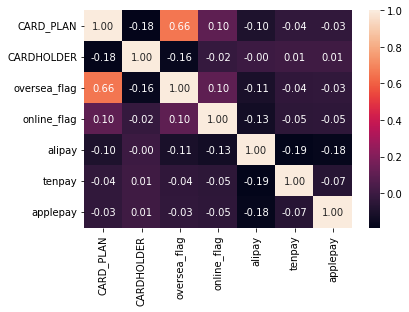

In [65]:
import seaborn as sns
corr = corr_set.corr()
sns.heatmap(corr, annot= True, fmt = '.2f')
plt.show()

##Tenure

In [66]:
info_credit = Cust_Info[['Customer_id', 'FirstContactDay']].merge(Credit_Card_Txn[['Customer_id']],how='right',on='Customer_id')
info_credit[:5]

,Customer_id,FirstContactDay
0,500999800634562,20161201
1,500999800716097,20170306
2,500999801039149,20180305
3,500999800890126,20170921
4,500999801080036,20180413


In [67]:
tenure = 2018 - info_credit['FirstContactDay'] // 10000
Credit_Card_Txn['tenure'] = tenure

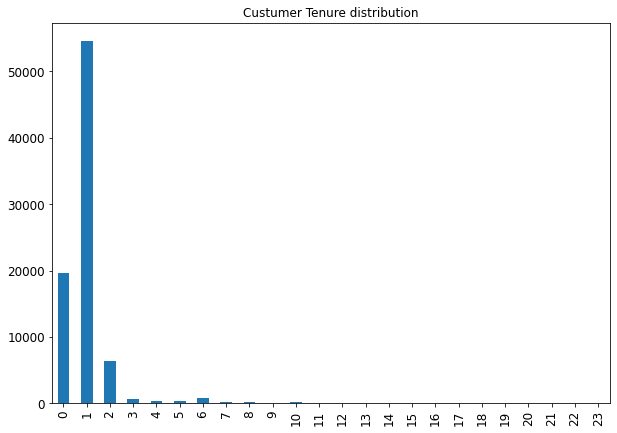

In [68]:
tenure_unique = 2018 - info_credit.drop_duplicates()['FirstContactDay'] // 10000
tenure_unique.value_counts().sort_index().plot(kind='bar', figsize=(10,7), title='Custumer Tenure distribution', fontsize=12)

## Transaction Category

In [69]:
trans_count = Credit_Card_Txn[['Customer_id', 'TRANS_GROUP']].value_counts().rename_axis(['Customer_id', 'TRANS_GROUP']).reset_index(name='trans_count')

In [70]:
trans_tenure = trans_count.merge(Credit_Card_Txn[['Customer_id','tenure']],how='right',on='Customer_id')

In [71]:
cash_advance_tenure = trans_tenure[trans_tenure['TRANS_GROUP'] == '2.cash advance'].drop_duplicates()

Text(0, 0.5, 'trans_count')

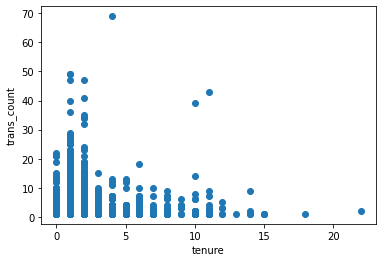

In [72]:
plt.scatter(cash_advance_tenure['tenure'], cash_advance_tenure['trans_count'])
plt.xlabel('tenure')
plt.ylabel('trans_count')
#old clients had a lower cash advance frequency?

## Oversea/Online Prob

In [73]:
def calculate_prob(value, prob, Credit_Card_Txn):
  freq = Credit_Card_Txn[['Customer_id', value, 'value_counts']].value_counts().rename_axis(['Customer_id', value, 'value_counts']).reset_index(name='freq')
  freq[prob] = freq['freq'] / freq['value_counts']
  Credit_Card_Txn = Credit_Card_Txn.merge(freq[freq[value] == 1][['Customer_id', prob]],how='left',on='Customer_id')
  return Credit_Card_Txn

In [74]:
features = ['oversea_flag', 'online_flag', 'alipay', 'tenpay', 'applepay']
for i in features:
  Credit_Card_Txn = calculate_prob(i, i + '_prob', Credit_Card_Txn)

## K-means

In [ ]:
k_means_feature = ['Customer_id', 'CARD_PLAN', 'CARDHOLDER', 'tenure', 'oversea_flag_prob', 'online_flag_prob', 'alipay_prob', 'tenpay_prob', 'applepay_prob']

In [ ]:
Cluster_data = Credit_Card_Txn[k_means_feature].drop_duplicates().fillna(0)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=1000,init='k-means++').fit(Cluster_data)
print(kmeans.labels_)

# The center of each cluster
print(kmeans.cluster_centers_)

[3 3 1 ... 2 2 1]
[[ 5.00999801e+14  1.00968959e-01  9.97256045e-01  1.00000000e+00
   3.31922355e-02  2.64907956e-02  1.83896720e-01  3.06383549e-02
   2.39052311e-02]
 [ 5.00999801e+14  3.32232464e-02  9.98471928e-01 -8.74855743e-14
   1.61420041e-02  1.82109469e-02  1.22812029e-01  1.11912152e-01
   1.56051957e-02]
 [ 5.00999800e+14  2.90743155e-01  9.69035202e-01  6.24217731e+00
   1.49072407e-01  4.49324602e-02  2.39947862e-01  3.40391578e-02
   4.37376956e-02]
 [ 5.00999801e+14  1.37834901e-01  9.96030808e-01  1.63464537e+00
   3.85220055e-02  3.38885192e-02  1.94322500e-01  3.43624287e-02
   4.97258598e-02]
 [ 5.00999801e+14  5.70961796e-02  9.97109584e-01  9.99497319e-01
   2.81633291e-02  2.59690250e-02  1.33002112e-01  4.94900493e-02
   2.20679952e-02]]


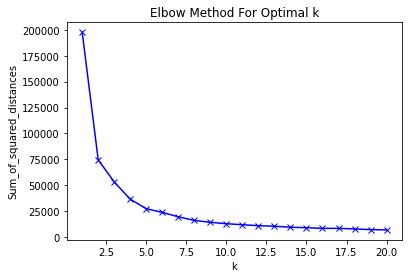

In [ ]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,21)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(Cluster_data[k_means_feature[1:]])

In [ ]:
Cluster_data['cluster'] = kmeans.labels_
Cluster_data['cluster'].value_counts()

4    23906
0    23326
3    21207
1    20207
2     3068
Name: cluster, dtype: int64

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
X = Cluster_data[k_means_feature[1:]]
y = Cluster_data[['cluster']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [ ]:
clf_xgb = xgb.XGBClassifier(objective = 'multi：softmax',
                            gamma = 0, 
                            learning_rate = 0.1, 
                            max_depth = 4, 
                            red_lambda = 0, 
                            scale_pos_weight = 1,
                            num_class = 5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose = True, 
            early_stopping_rounds = 10, 
            eval_metric = 'mlogloss', 
            eval_set = [(X_test, y_test)])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:1.50093
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.41353
[2]	validation_0-mlogloss:1.34067
[3]	validation_0-mlogloss:1.27866
[4]	validation_0-mlogloss:1.22474
[5]	validation_0-mlogloss:1.17783
[6]	validation_0-mlogloss:1.1364
[7]	validation_0-mlogloss:1.09967
[8]	validation_0-mlogloss:1.06707
[9]	validation_0-mlogloss:1.0378
[10]	validation_0-mlogloss:1.01155
[11]	validation_0-mlogloss:0.987913
[12]	validation_0-mlogloss:0.966598
[13]	validation_0-mlogloss:0.947276
[14]	validation_0-mlogloss:0.929849
[15]	validation_0-mlogloss:0.914102
[16]	validation_0-mlogloss:0.899614
[17]	validation_0-mlogloss:0.886585
[18]	validation_0-mlogloss:0.874535
[19]	validation_0-mlogloss:0.863538
[20]	validation_0-mlogloss:0.85359
[21]	validation_0-mlogloss:0.844373
[22]	validation_0-mlogloss:0.836048
[23]	validation_0-mlogloss:0.828374
[24]	validation_0-mlogloss:0.821264
[25]	validation_0-mlogloss:0.814754
[26]	validation_0-m

XGBClassifier(max_depth=4, num_class=5, objective='multi:softprob',
              red_lambda=0)

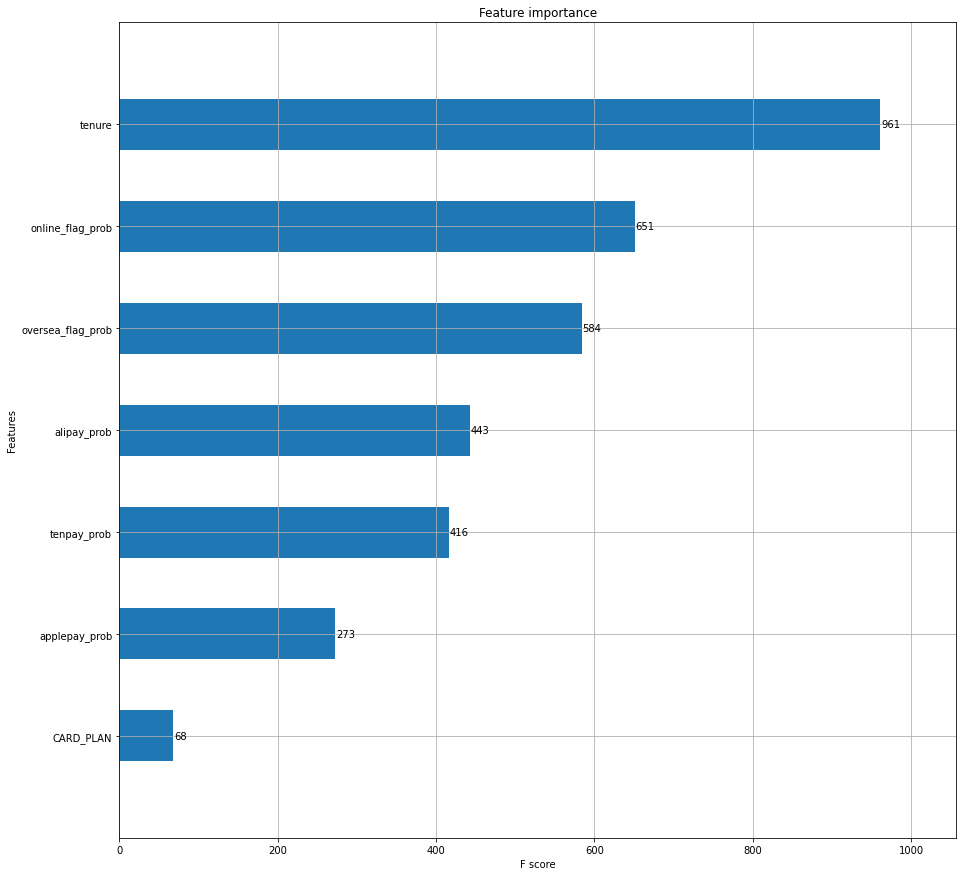

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize = (15, 15))
plot_importance(clf_xgb, 
                height = 0.5,
                ax = ax,
               max_num_features = 7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


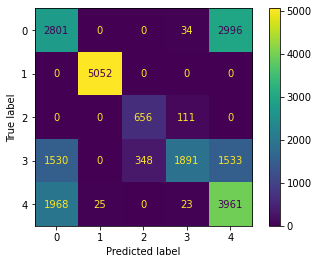

In [ ]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format = 'd',
                      display_labels = [0, 1, 2, 3, 4])

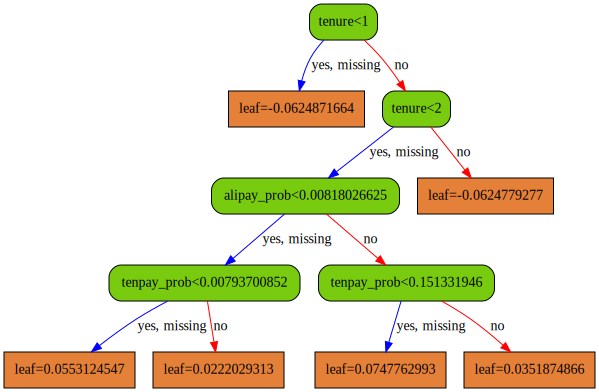

In [ ]:
node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}
xgb.to_graphviz(clf_xgb, num_trees = 0, size = '10, 10',
                condition_node_params = node_params,
                leaf_node_params = leaf_params)

# **ISST_Summary**

In [75]:
ISST_Summary = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_ISST_Summary.txt", sep='|',header=None, names=["Eventdate", "Channel", "Customer_id", "Producttype", "Pagetype", "Pageviewnum", "Pageviewtime"])
ISST_Summary

FileNotFoundError: ignored

In [ ]:
ISST_table = ISST_Summary.groupby(["Customer_id","Channel","Producttype","Pagetype"]).agg({'Pageviewnum': np.mean,'Pageviewtime':np.mean})
ISST_table

In [ ]:
ISST_Summary_Channel = ISST_Summary['Channel'].value_counts()
ISST_Summary_Channel.plot(kind='bar', figsize=(10,7), title='ISST Channel distribution', fontsize=12)

In [ ]:
ISST_Summary_Producttype = ISST_Summary['Producttype'].value_counts()
ISST_Summary_Producttype.plot(kind='bar', figsize=(10,7), title='ISST Producttype distribution', fontsize=12)

In [ ]:
ISST_Summary_Pagetype = ISST_Summary['Pagetype'].value_counts()
ISST_Summary_Pagetype.plot(kind='bar', figsize=(10,7), title='ISST Page type distribution', fontsize=12)

In [ ]:
ISST_Summary_Pageviewnum = ISST_Summary['Pageviewnum'].value_counts()[:10]
ISST_Summary_Pageviewnum.plot(kind='bar', figsize=(10,7), title='ISST Page view num distribution', fontsize=12)

# **Merge all quant data**

In [76]:
Cust_Info

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,Period_Salary,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc,YearsAfterFirstContact
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,0.0,CN,0,...,M,2.0,0.0,NaN,NaN,Y,1,00130,OTHERS ...,9
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,5,00275,RECREATION ...,1
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,2
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,1,00194,OTHER FINANCIAL INDUSTRY ...,5
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,0,...,Y,2.0,0.0,4.0,1.0,NaN,2,,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300034,500999800856528,48.0,20170817,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,5,00405,AIRLINE TRANSPORTATION ...,1
300035,500999800106832,NaN,20111008,0,NaN,NaN,NaN,NaN,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,,NaN,7
300036,500999800200458,30.0,20151207,0,NaN,16.0,OTHER,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,1,00130,OTHERS ...,3
300037,500999800193136,37.0,20150202,1,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,M,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3


In [77]:
# Add "Attrition_or_not" to binary classify Customer_segment into Attrition or not
# Attrition=1; else=0
Cust_Info['Attrition_or_not'] = Cust_Info.apply(lambda x: 1 if x['Cust_Segment'] ==1 else 0, axis=1)
Cust_Info

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,Marital_Status,Number_Children,Education_Level,Home_Ownership,Car_Ownership,Cust_Segment,BusSector,BusDesc,YearsAfterFirstContact,Attrition_or_not
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,0.0,CN,0,...,2.0,0.0,NaN,NaN,Y,1,00130,OTHERS ...,9,1
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,0.0,NaN,NaN,NaN,5,00275,RECREATION ...,1,0
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,0.0,NaN,NaN,NaN,1,NaN,NaN,2,1
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,1.0,CN,0,...,NaN,0.0,NaN,NaN,NaN,1,00194,OTHER FINANCIAL INDUSTRY ...,5,1
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,0,...,2.0,0.0,4.0,1.0,NaN,2,,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300034,500999800856528,48.0,20170817,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,0.0,NaN,NaN,NaN,5,00405,AIRLINE TRANSPORTATION ...,1,0
300035,500999800106832,NaN,20111008,0,NaN,NaN,NaN,NaN,CN,0,...,NaN,NaN,NaN,NaN,NaN,1,,NaN,7,1
300036,500999800200458,30.0,20151207,0,NaN,16.0,OTHER,1.0,CN,0,...,NaN,0.0,NaN,NaN,NaN,1,00130,OTHERS ...,3,1
300037,500999800193136,37.0,20150202,1,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,0.0,NaN,NaN,NaN,5,00130,OTHERS ...,3,0


In [78]:
filtered_cust_info = Cust_Info[['Customer_id','age','PBK_Ind','Gender','Cust_Segment','YearsAfterFirstContact','Attrition_or_not']]
filtered_cust_info

,Customer_id,age,PBK_Ind,Gender,Cust_Segment,YearsAfterFirstContact,Attrition_or_not
0,500999800150176,55.0,0,0.0,1,9,1
1,500999800895910,38.0,1,1.0,5,1,0
2,500999800182523,35.0,1,1.0,1,2,1
3,500999800319932,31.0,0,1.0,1,5,1
4,500999800818899,30.0,0,1.0,2,1,0
...,...,...,...,...,...,...,...
300034,500999800856528,48.0,1,1.0,5,1,0
300035,500999800106832,NaN,0,NaN,1,7,1
300036,500999800200458,30.0,0,1.0,1,3,1
300037,500999800193136,37.0,1,1.0,5,3,0


In [79]:
# filling in missing values
imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # mean
imp = imp.fit(filtered_cust_info[['age','Gender']])
filtered_cust_info[['age','Gender']] = imp.transform(filtered_cust_info[['age','Gender']])
filtered_cust_info

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Customer_id,age,PBK_Ind,Gender,Cust_Segment,YearsAfterFirstContact,Attrition_or_not
0,500999800150176,55.0,0,0.0,1,9,1
1,500999800895910,38.0,1,1.0,5,1,0
2,500999800182523,35.0,1,1.0,1,2,1
3,500999800319932,31.0,0,1.0,1,5,1
4,500999800818899,30.0,0,1.0,2,1,0
...,...,...,...,...,...,...,...
300034,500999800856528,48.0,1,1.0,5,1,0
300035,500999800106832,29.0,0,1.0,1,7,1
300036,500999800200458,30.0,0,1.0,1,3,1
300037,500999800193136,37.0,1,1.0,5,3,0


In [80]:
filtered_cust_info['age'].isna().sum()

0

In [81]:
Product_table['product_or_not'] = [1] * Product_table.shape[0]
Product_table

,Product_Code_QDUT,FUM_LCY_QDUT,Product_Code_Ins,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,CPI_TimeGap,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not
Customer_id,,,,,,,,,,,,,
500999800069651,4.0,6.274519e+05,1.0,3.0,3737338.97,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,1
500999800069999,1.0,1.311823e+06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,1
500999800070132,1.0,6.968705e+05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,9.0,1.674681e+06,-0.222222,1
500999800070171,3.0,6.183250e+05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,1
500999800070712,1.0,6.188122e+05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.702500e+02,3.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500999800811780,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.0,1.081958e+05,0.000000,1
500999800815216,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.570000e+05,0.000000,1
500999800816271,0.0,0.000000e+00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.779334e+04,0.000000,1


In [87]:
Credit_Card_value = pd.read_csv("/content/gdrive/MyDrive/2022 Spring/capstone HSBC Lifecycle/Credit_Card_value.csv", sep=',')# ,header=None) #, names=["Customer_id", "CARD_PLAN", "CARDHOLDER", "PBK_Ind", "HIB_Status", "OccuCode", "OccuDesc", "Gender", "Cntry_Correspondense", "InterCorpACIndicator", "NationCode", "IncomeLevel", "Salary", "Period_Salary", "Marital_Status", "Number_Children", "Education_Level", "Home_Ownership", "Car_Ownership", "Cust_Segment", "BusSector", "BusDesc"])
Credit_Card_value = Credit_Card_value.drop(['Unnamed: 0'],axis=1)
Credit_Card_value['credit_or_not'] = [1] * Credit_Card_value.shape[0]
Credit_Card_value

,Customer_id,tenure,oversea_flag_prob,online_flag_prob,alipay_prob,tenpay_prob,applepay_prob,spending_trans_counts,spending_BILL_TOTAL,installment_trans_counts,...,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,credit_or_not
0,500999800634562,2,0.000000,0.000000,0.125000,0.000000,0.000000,2.0,7589.380,1.0,...,601.42,13.0,6907.00,NaN,NaN,NaN,NaN,NaN,NaN,1
1,500999800716097,1,0.000000,0.000000,0.000000,0.000000,0.000000,12.0,308721.660,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,500999801039149,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,78500.000,1.0,...,1530.75,3.0,13083.33,1.0,-157.0,NaN,NaN,NaN,NaN,1
3,500999800890126,1,0.005076,0.005076,0.005076,0.000000,0.000000,386.0,155892.630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,500999801080036,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,82095.300,NaN,...,NaN,NaN,NaN,1.0,-157.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,500999801017259,0,0.000000,0.000000,0.000000,0.000000,0.000000,38.0,219394.310,NaN,...,NaN,NaN,NaN,1.0,-157.0,NaN,NaN,NaN,NaN,1
83574,500999801093615,0,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,43357.120,1.0,...,NaN,NaN,NaN,1.0,-157.0,NaN,NaN,NaN,NaN,1
83575,500999800947286,1,0.000000,0.000000,0.027778,0.027778,0.027778,92.0,2118573.540,NaN,...,NaN,NaN,NaN,1.0,-62.8,NaN,NaN,NaN,NaN,1
83576,500999800074516,11,0.100000,0.000000,0.000000,0.000000,0.000000,34.0,120232.955,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [83]:
Merge1 = Cust_Info.merge(Product_table,how='left',on='Customer_id')
Merge1

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,CPI_TimeGap,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not
0,500999800150176,55.0,20090819,0,NaN,9.0,NOT WORKING - HOUSEWIFE,0.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500999800182523,35.0,20160108,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500999800319932,31.0,20131111,0,NaN,16.0,OTHER,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300034,500999800856528,48.0,20170817,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300035,500999800106832,NaN,20111008,0,NaN,NaN,NaN,NaN,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300036,500999800200458,30.0,20151207,0,NaN,16.0,OTHER,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300037,500999800193136,37.0,20150202,1,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
Merge1[Merge1['Customer_id']==500999801109919]

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,CPI_TimeGap,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not
167590,500999801109919,28.0,20180522,0,NaN,3.0,CLERICAL,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
Merge2 = Cust_Info.merge(Credit_Card_value,how='inner',on='Customer_id')
Merge2

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,credit_or_not
0,500999800895910,38.0,20170927,1,N,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,973.92,3.0,21644.04,NaN,NaN,NaN,NaN,NaN,NaN,1
1,500999800818899,30.0,20170703,0,NaN,3.0,CLERICAL,1.0,CN,0,...,125.60,1.0,1308.34,NaN,NaN,NaN,NaN,NaN,NaN,1
2,500999801040158,31.0,20180305,0,NaN,3.0,CLERICAL,1.0,CN,0,...,NaN,NaN,NaN,1.0,-157.0,NaN,NaN,NaN,NaN,1
3,500999800933280,24.0,20171108,0,NaN,3.0,CLERICAL,0.0,CN,0,...,282.60,NaN,NaN,NaN,NaN,7.0,3023.100,3.0,14130.0,1
4,500999801014287,30.0,20180130,0,NaN,3.0,CLERICAL,1.0,CN,0,...,NaN,NaN,NaN,NaN,NaN,1.0,423.960,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,500999800604403,31.0,20160816,0,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,201.84,4.0,4520.39,2.0,-188.4,NaN,NaN,NaN,NaN,1
83574,500999800692034,24.0,20170208,1,N,2.0,NaN,1.0,CN,0,...,241.96,2.0,8065.37,3.0,-251.2,NaN,NaN,NaN,NaN,1
83575,500999800830863,61.0,20170714,0,NaN,2.0,ADMINISTRATIVE/EXECUTIVE,1.0,CN,0,...,3913.29,16.0,19220.86,NaN,NaN,12.0,7290.635,17.0,111470.0,1
83576,500999801061071,24.0,20180323,1,N,3.0,CLERICAL,0.0,CN,0,...,147.98,3.0,768.48,2.0,-188.4,2.0,531.160,NaN,NaN,1


In [89]:
Merge2[Merge2['Customer_id']==500999801109919]

,Customer_id,age,FirstContactDay,PBK_Ind,HIB_Status,OccuCode,OccuDesc,Gender,Cntry_Correspondense,InterCorpACIndicator,...,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,credit_or_not
46645,500999801109919,28.0,20180522,0,NaN,3.0,CLERICAL,1.0,CN,0,...,NaN,NaN,NaN,1.0,-157.0,NaN,NaN,NaN,NaN,1


In [90]:
filtered_cust_info.isna().sum()

Customer_id               0
age                       0
PBK_Ind                   0
Gender                    0
Cust_Segment              0
YearsAfterFirstContact    0
Attrition_or_not          0
dtype: int64

In [102]:
credit_product_merge = Credit_Card_value.merge(Product_table,how='outer',on='Customer_id')
Merged = filtered_cust_info.merge(credit_product_merge,how='left',on='Customer_id') 
Merged.fillna(0,inplace=True)
Merged

,Customer_id,age,PBK_Ind,Gender,Cust_Segment,YearsAfterFirstContact,Attrition_or_not,tenure,oversea_flag_prob,online_flag_prob,...,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,CPI_TimeGap,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not
0,500999800150176,55.0,0,0.0,1,9,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,500999800895910,38.0,1,1.0,5,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,500999800182523,35.0,1,1.0,1,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500999800319932,31.0,0,1.0,1,5,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,500999800818899,30.0,0,1.0,2,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300034,500999800856528,48.0,1,1.0,5,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300035,500999800106832,29.0,0,1.0,1,7,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300036,500999800200458,30.0,0,1.0,1,3,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300037,500999800193136,37.0,1,1.0,5,3,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
Merged.isna().sum()

Customer_id                  0
age                          0
PBK_Ind                      0
Gender                       0
Cust_Segment                 0
YearsAfterFirstContact       0
Attrition_or_not             0
tenure                       0
oversea_flag_prob            0
online_flag_prob             0
alipay_prob                  0
tenpay_prob                  0
applepay_prob                0
spending_trans_counts        0
spending_BILL_TOTAL          0
installment_trans_counts     0
installment_BILL_TOTAL       0
repayment_trans_counts       0
repayment_BILL_TOTAL         0
fee_trans_counts             0
fee_BILL_TOTAL               0
others_trans_counts          0
others_BILL_TOTAL            0
Cash rebate_trans_counts     0
Cash rebate_BILL_TOTAL       0
interest_trans_counts        0
interest_BILL_TOTAL          0
cash advance_trans_counts    0
cash advance_BILL_TOTAL      0
credit_or_not                0
Product_Code_QDUT            0
FUM_LCY_QDUT                 0
Product_

In [1]:
Merged.loc[Merged["Customer_id"] == 500999800378245]

NameError: ignored

# **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression

In [ ]:
Merged.columns

Index(['Customer_id', 'age', 'PBK_Ind', 'Gender', 'Cust_Segment',
       'YearsAfterFirstContact', 'Attrition_or_not', 'tenure',
       'oversea_flag_prob', 'online_flag_prob', 'alipay_prob', 'tenpay_prob',
       'applepay_prob', 'spending_trans_counts', 'spending_BILL_TOTAL',
       'installment_trans_counts', 'installment_BILL_TOTAL',
       'repayment_trans_counts', 'repayment_BILL_TOTAL', 'fee_trans_counts',
       'fee_BILL_TOTAL', 'others_trans_counts', 'others_BILL_TOTAL',
       'Cash rebate_trans_counts', 'Cash rebate_BILL_TOTAL',
       'interest_trans_counts', 'interest_BILL_TOTAL',
       'cash advance_trans_counts', 'cash advance_BILL_TOTAL', 'credit_or_not',
       'Product_Code_QDUT', 'FUM_LCY_QDUT', 'Product_Code_Ins', 'Term_Ins',
       'Market_Value_Ins', 'Acct_CPI_num', 'MTDAVG_CPI', 'CPI_TimeGap',
       'Term_CPI', 'Acct_TD_num', 'MTDAVG_TD', 'TD_TimeGap', 'product_or_not'],
      dtype='object')

In [ ]:
X = Merged.drop(columns=['Cust_Segment','Customer_id','Attrition_or_not'])
y_binary = Merged['Attrition_or_not'].values
y_multi = Merged['Cust_Segment'].values

## binary classification

In [ ]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
## KNN classification
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict_KNN = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predict_KNN))
print(classification_report(y_test, y_predict_KNN)) 

[[43839  4024]
 [ 7564  4581]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     47863
           1       0.53      0.38      0.44     12145

    accuracy                           0.81     60008
   macro avg       0.69      0.65      0.66     60008
weighted avg       0.79      0.81      0.79     60008



In [ ]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

y_predict_LR = LR.predict(X_test)

print(confusion_matrix(y_test, y_predict_LR))
print(classification_report(y_test, y_predict_LR)) 
print(LR.predict_proba(X_test)[:,1])

[[47812    51]
 [12109    36]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     47863
           1       0.41      0.00      0.01     12145

    accuracy                           0.80     60008
   macro avg       0.61      0.50      0.45     60008
weighted avg       0.72      0.80      0.71     60008

[3.55798159e-01 1.00351446e-01 2.72423169e-06 ... 1.18351743e-02
 3.67905372e-01 3.92841358e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## multi-class classification

In [ ]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.20) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 